## Import Library

In [28]:
#main
import pandas as pd
import numpy as np
import os
#viz
import seaborn as sns 
import matplotlib.pyplot as plt 
#mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Data Loading

## Load data from local in google colab

In [29]:
list_file = os.listdir('/content/High risk ')
list_file

['Schroder 90 Plus Equity Fund Clean.csv',
 'DanaReksa Mawah Konsumer 10 Kelas A Clean.csv',
 'Manulife Saham Andalan Clean.csv',
 'Simas Saham Unggulan Clean.csv',
 'Sucroinvest Sharia Equity Fund Clean.csv',
 'BNI-AM Inspiring Equity Fund Clean.csv',
 'Sucroinvest Equity Fund Clean.csv',
 'BNI-AM Indeks IDX30 Clean.csv',
 'Manulife Dana Saham Kelas A Clean.csv',
 'Batavia Dana Saham Clean.csv']

In [30]:
dataset = []
for file in list_file:
  name = file.split('.')[0]
  dataset.append(name)
print(dataset)

['Schroder 90 Plus Equity Fund Clean', 'DanaReksa Mawah Konsumer 10 Kelas A Clean', 'Manulife Saham Andalan Clean', 'Simas Saham Unggulan Clean', 'Sucroinvest Sharia Equity Fund Clean', 'BNI-AM Inspiring Equity Fund Clean', 'Sucroinvest Equity Fund Clean', 'BNI-AM Indeks IDX30 Clean', 'Manulife Dana Saham Kelas A Clean', 'Batavia Dana Saham Clean']


In [31]:
df = {}
for i in dataset:
  df[i] = pd.read_csv('/content/High risk /' +i +'.csv')

In [32]:
df['Simas Saham Unggulan Clean'].head(20)

,Unnamed: 0,date,value,Next,Class
0,0,2022-09-16,1338.0658,1345.5034,1
1,1,2022-09-19,1345.5034,1342.0403,0
2,2,2022-09-20,1342.0403,1338.9330,0
3,3,2022-09-21,1338.9330,1347.1300,1
4,4,2022-09-22,1347.1300,1337.3417,0
5,5,2022-09-23,1337.3417,1326.6553,0
6,6,2022-09-26,1326.6553,1325.0063,0
7,7,2022-09-27,1325.0063,1317.0215,0
8,8,2022-09-28,1317.0215,1312.8595,0
9,9,2022-09-29,1312.8595,1315.2994,1


In [33]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   date        66 non-null     object 
 2   value       66 non-null     float64
 3   Next        65 non-null     float64
 4   Class       66 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB


In [34]:
for i in dataset:
  df[i]['date'] = pd.to_datetime(df[i]['date']) 

In [35]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  66 non-null     int64         
 1   date        66 non-null     datetime64[ns]
 2   value       66 non-null     float64       
 3   Next        65 non-null     float64       
 4   Class       66 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.7 KB


## Split train-test

In [36]:
data_new = {}
for i in dataset:
  size = int(len(df[i]) * 0.8)
  data_new[i] = {}
  data_new[i]['train'] = df[i]['value'].iloc[0:size]
  data_new[i]['test'] = df[i]['value'].iloc[size-1:len(df[i])]

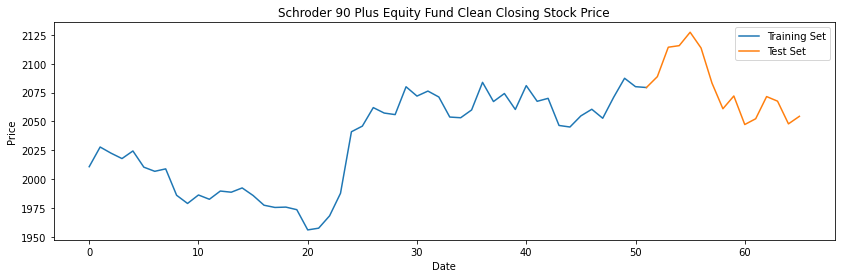

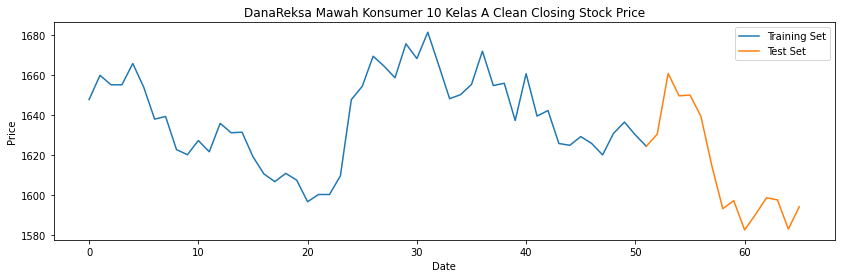

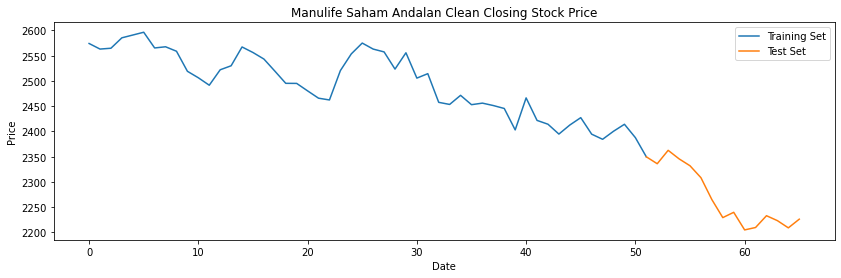

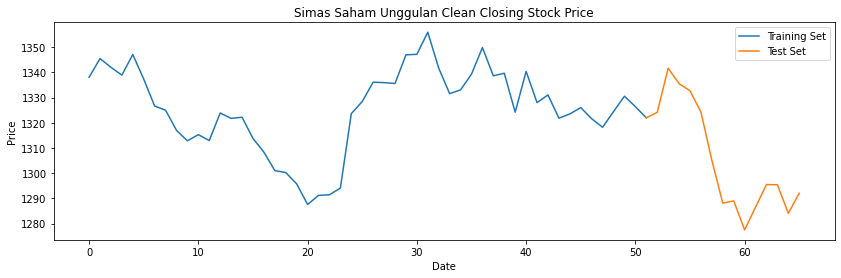

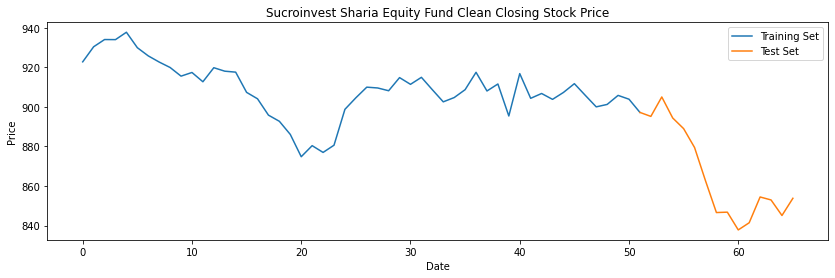

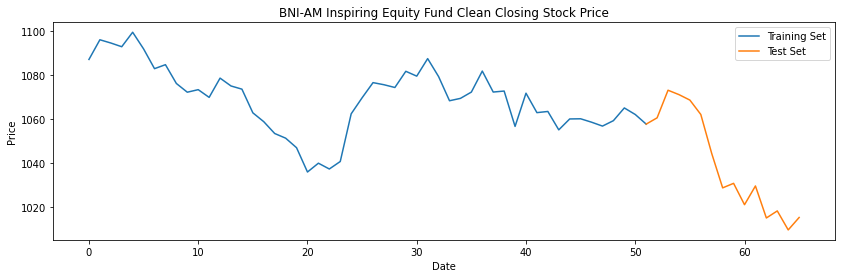

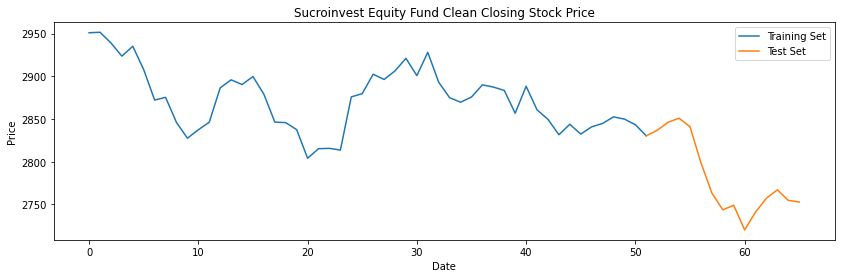

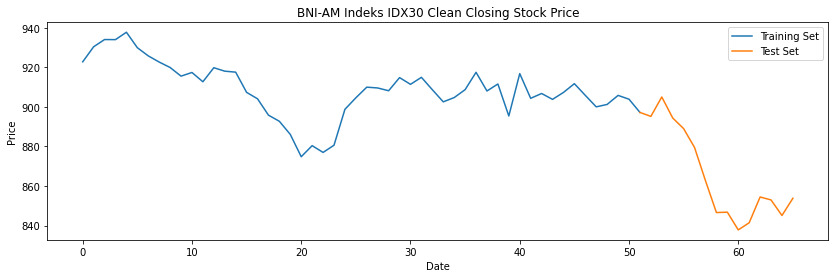

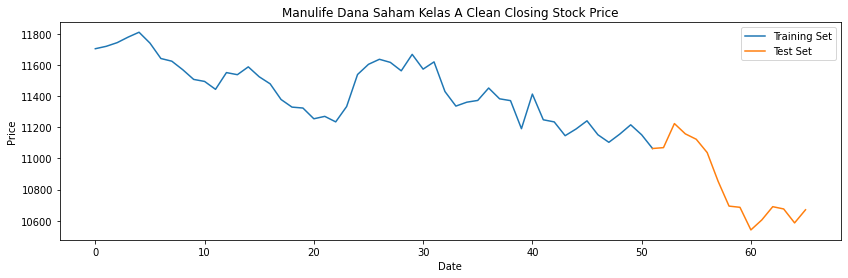

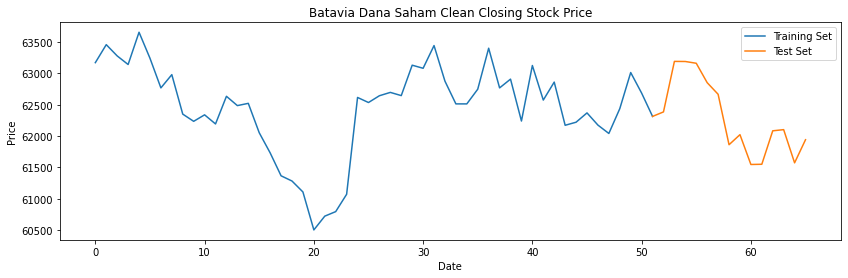

In [37]:
for i in dataset:
    plt.figure(figsize=(14,4))
    plt.plot(data_new[i]["train"])
    plt.plot(data_new[i]["test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [38]:
df['Simas Saham Unggulan Clean'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  66 non-null     int64         
 1   date        66 non-null     datetime64[ns]
 2   value       66 non-null     float64       
 3   Next        65 non-null     float64       
 4   Class       66 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.7 KB


## Scalling

In [39]:
train_scaled = {}
test_scaled = {}
scaler = {}

for num, i in enumerate(dataset):
    sc = MinMaxScaler(feature_range=(0,1))
    train_reshape = np.array(data_new[i]["train"])
    test_reshape = np.array(data_new[i]["test"])
    train_reshape = train_reshape.reshape(-1,1)
    test_reshape = test_reshape.reshape(-1,1)
    train_scaled[i] = sc.fit_transform(train_reshape)
    test_scaled[i] = sc.transform(test_reshape)
    scaler[i] = sc


In [40]:
train_scaled['BNI-AM Indeks IDX30 Clean'].shape

(52, 1)

In [41]:
trainset = {}
testset = {}
for j in dataset:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(1, 48):
        X_train.append(train_scaled[j][i-1:i,0])
        y_train.append(train_scaled[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(1,14):
        X_test.append(test_scaled[j][i-1:i,0])
        y_test.append(test_scaled[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1]))
    testset[j]["y"] = y_test

In [42]:
arr_buff = []
for i in dataset:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=dataset)

,X_train,y_train,X_test,y_test
Schroder 90 Plus Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
DanaReksa Mawah Konsumer 10 Kelas A Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Manulife Saham Andalan Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Simas Saham Unggulan Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Sucroinvest Sharia Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
BNI-AM Inspiring Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Sucroinvest Equity Fund Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
BNI-AM Indeks IDX30 Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Manulife Dana Saham Kelas A Clean,"(47, 1)","(47,)","(13, 1)","(13,)"
Batavia Dana Saham Clean,"(47, 1)","(47,)","(13, 1)","(13,)"


## Model Definition

In [55]:
from keras.callbacks import EarlyStopping

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

earlystop = EarlyStopping(monitor='val_mae', patience=50)

In [66]:
%%time
# The LSTM architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the RNN
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

#Training Models
history = {}
for i in dataset:
    print("Train to", i)
    history[i] = model.fit(trainset[i]["X"], 
              trainset[i]["y"], 
              epochs=1000, 
              batch_size=8,
              validation_data=(testset[i]['X'], testset[i]['y']), 
              shuffle=False,
              callbacks=[Callback(), earlystop])

Train to Schroder 90 Plus Equity Fund Clean
Epoch 1/1000
6/6 [==============================] - 11s 631ms/step - loss: 0.1908 - mae: 0.5402 - val_loss: 0.4685 - val_mae: 0.9549
Epoch 2/1000
6/6 [==============================] - 1s 197ms/step - loss: 0.1899 - mae: 0.5385 - val_loss: 0.4669 - val_mae: 0.9531
Epoch 3/1000
6/6 [==============================] - 0s 89ms/step - loss: 0.1889 - mae: 0.5368 - val_loss: 0.4653 - val_mae: 0.9513
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.1879 - mae: 0.5350 - val_loss: 0.4637 - val_mae: 0.9494
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1868 - mae: 0.5332 - val_loss: 0.4620 - val_mae: 0.9475
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.1860 - mae: 0.5316 - val_loss: 0.4603 - val_mae: 0.9456
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.1849 - mae: 0.5297 - val_loss: 0.4586 - val_mae: 0.9437
Epoch 8/1000
6/6 [===================

## Loss & MAE

Schroder 90 Plus Equity Fund Clean - Loss & MAE


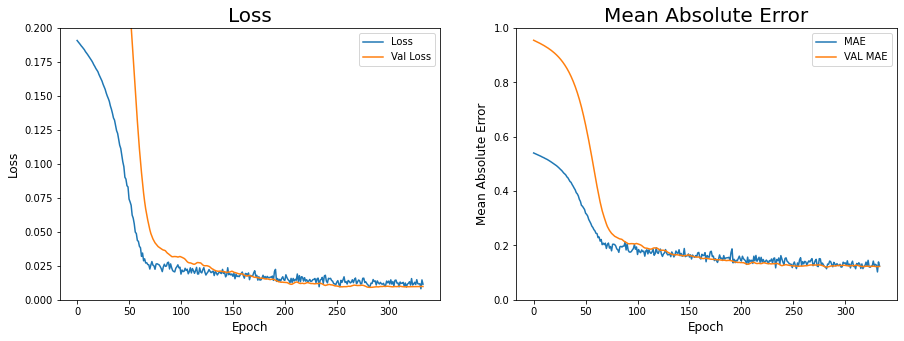

DanaReksa Mawah Konsumer 10 Kelas A Clean - Loss & MAE


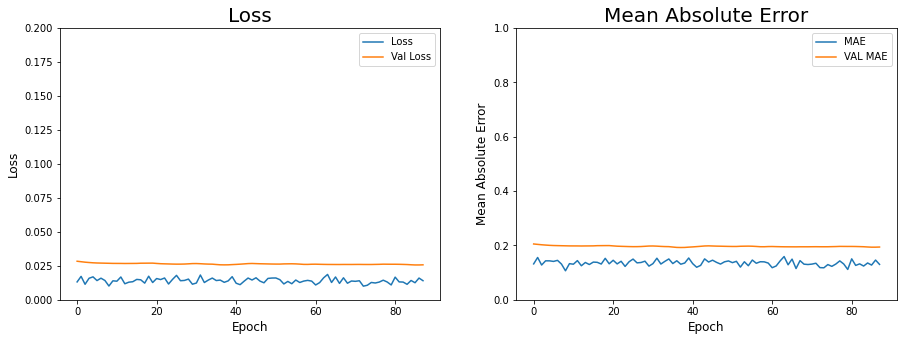

Manulife Saham Andalan Clean - Loss & MAE


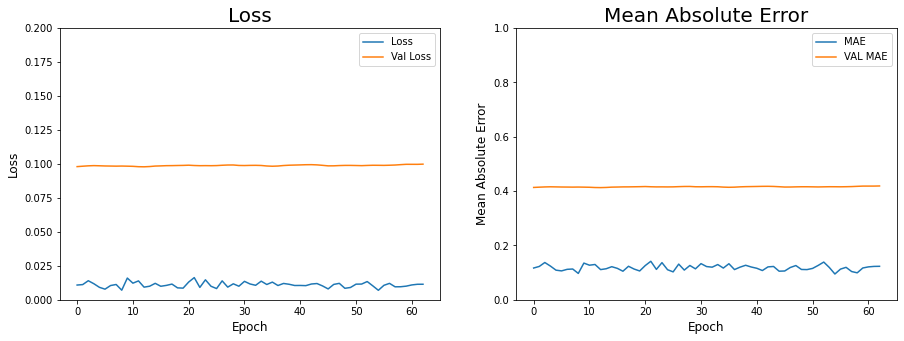

Simas Saham Unggulan Clean - Loss & MAE


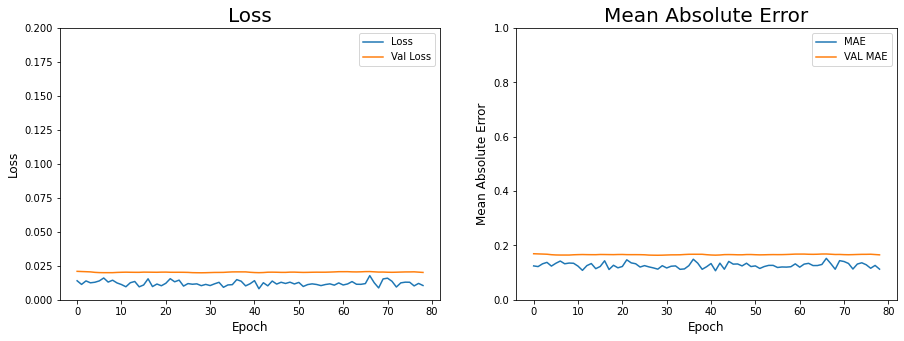

Sucroinvest Sharia Equity Fund Clean - Loss & MAE


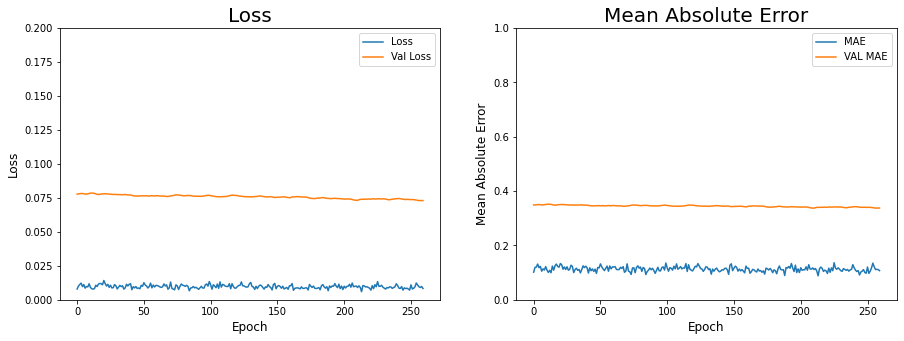

BNI-AM Inspiring Equity Fund Clean - Loss & MAE


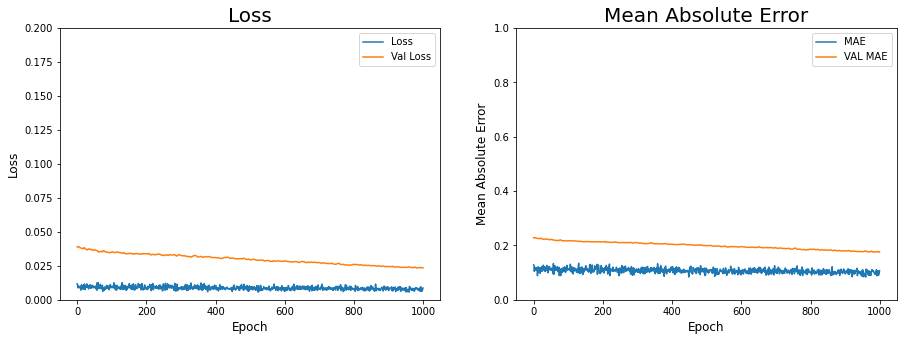

Sucroinvest Equity Fund Clean - Loss & MAE


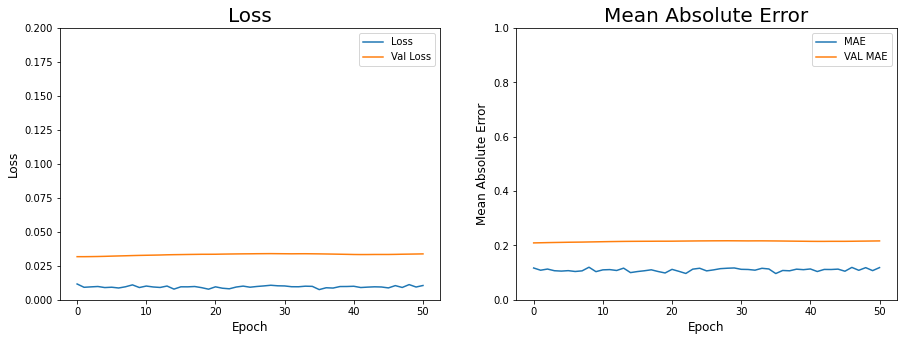

BNI-AM Indeks IDX30 Clean - Loss & MAE


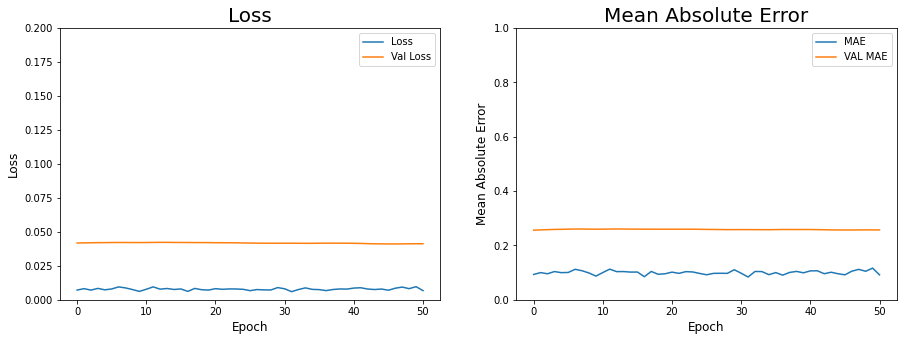

Manulife Dana Saham Kelas A Clean - Loss & MAE


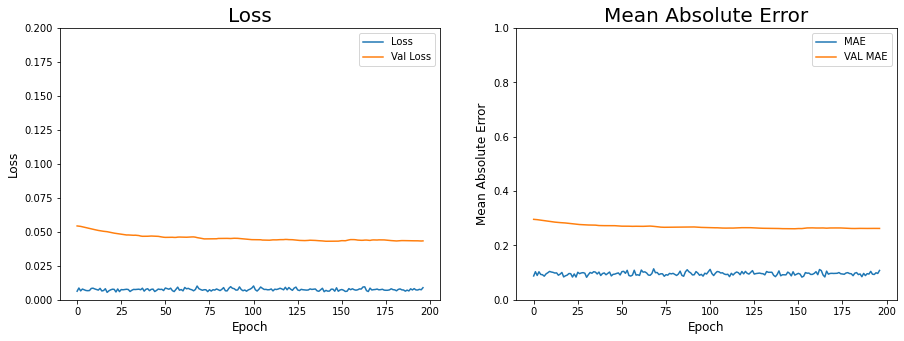

Batavia Dana Saham Clean - Loss & MAE


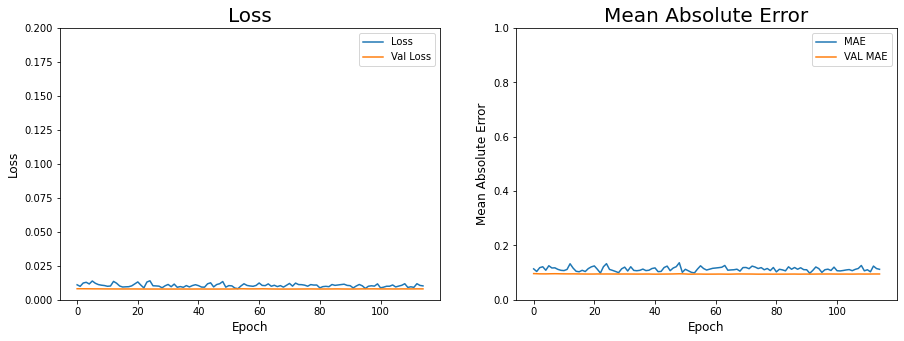

In [76]:
for i in dataset:
  print(i,"- Loss & MAE")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
  ax1.plot(history[i].history['loss'])
  ax1.plot(history[i].history['val_loss'])
  ax1.legend(['Loss','Val Loss'])
  ax1.axis(ymin=0,ymax=0.2)
  ax1.set_xlabel('Epoch', fontsize=12)
  ax1.set_ylabel('Loss', fontsize=12)
  ax1.set_title('Loss', fontsize=20)

  ax2.plot(history[i].history['mae'])
  ax2.plot(history[i].history['val_mae'])
  ax2.legend(['MAE','VAL MAE'])
  ax2.axis(ymin=0,ymax=1)
  ax2.set_xlabel('Epoch', fontsize=12)
  ax2.set_ylabel('Mean Absolute Error', fontsize=12)
  ax2.set_title('Mean Absolute Error', fontsize=20)
  plt.show()

## Actual vs Pred Test

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 370ms/step


1/1 [==============================] - 0s 26ms/step


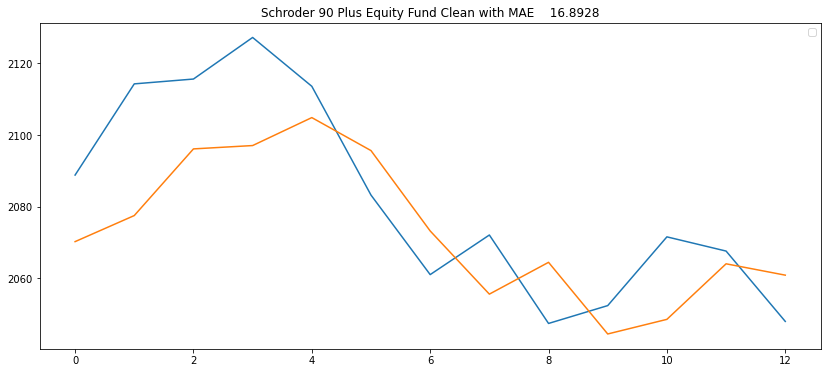

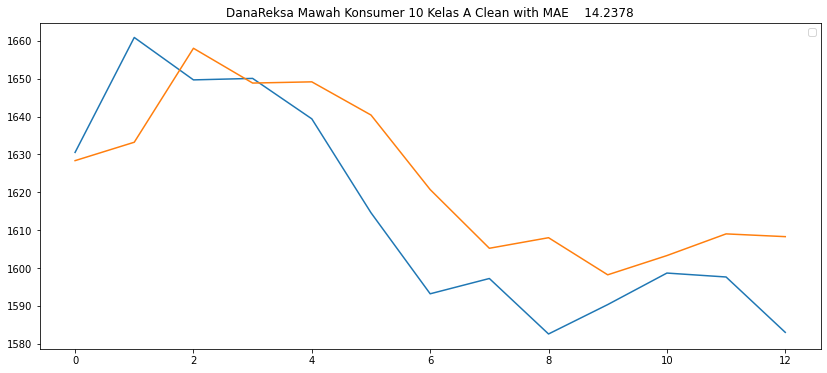

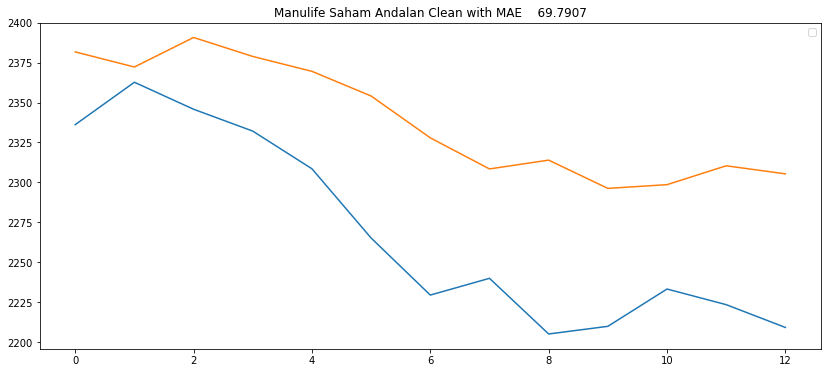

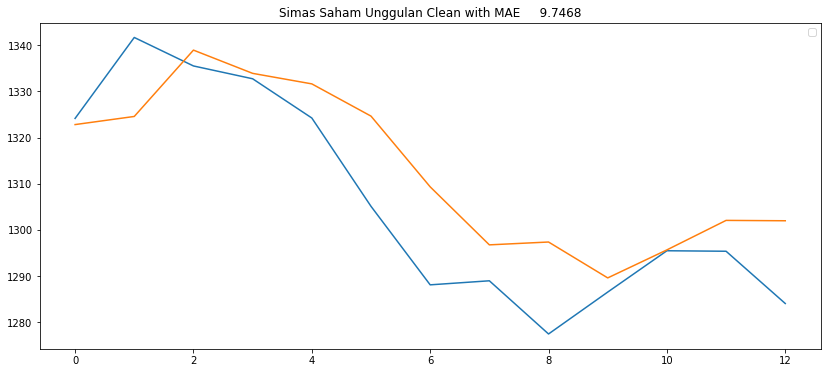

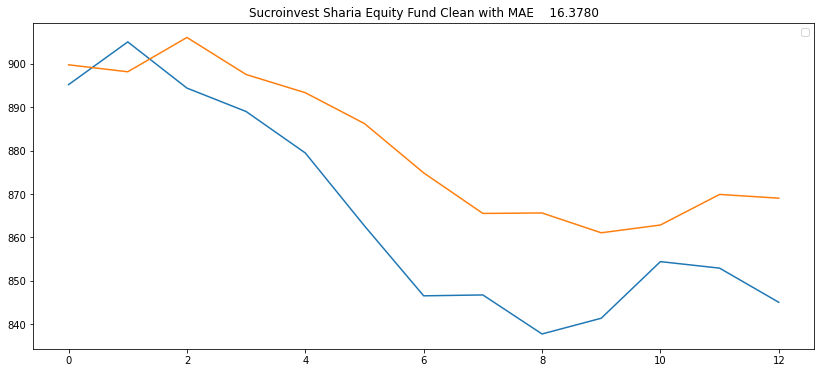

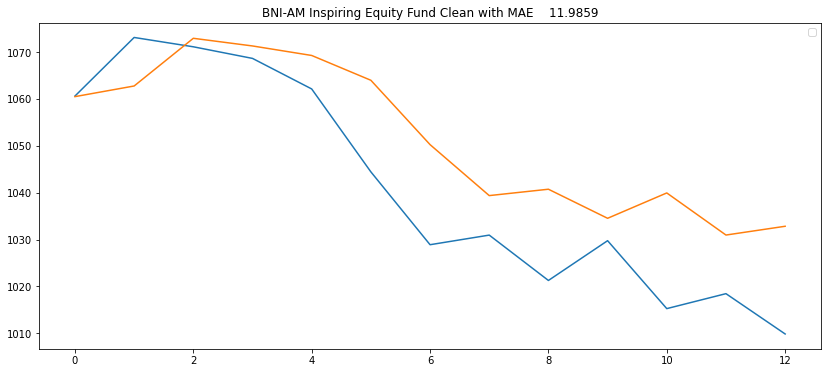

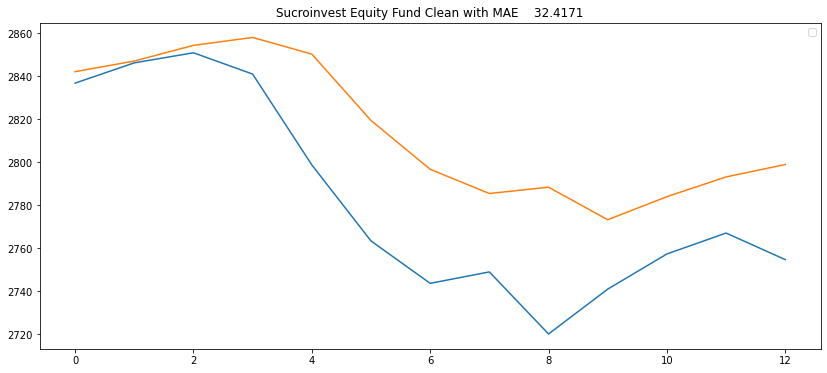

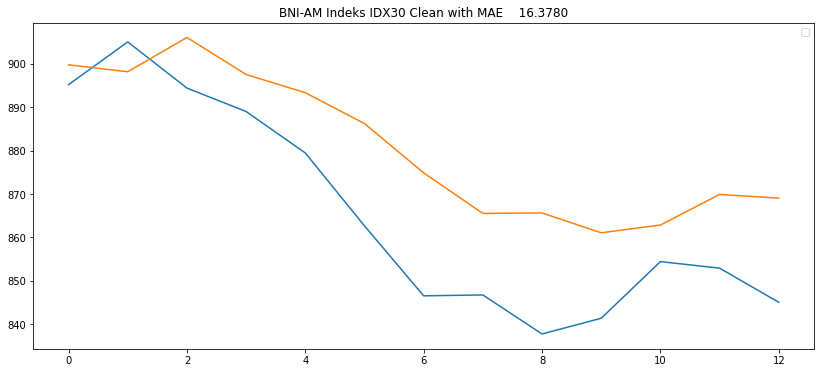

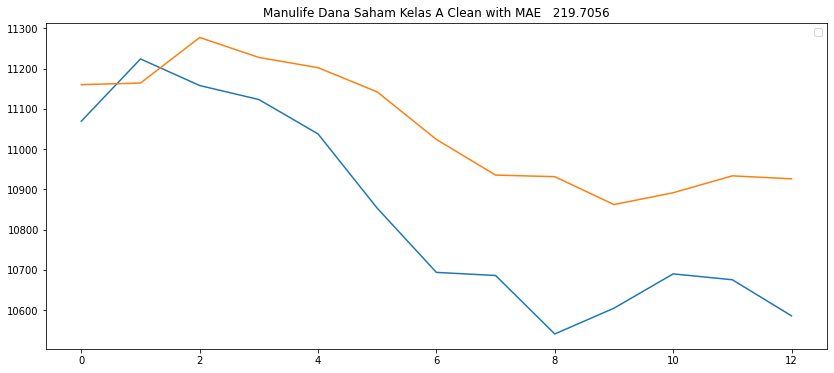

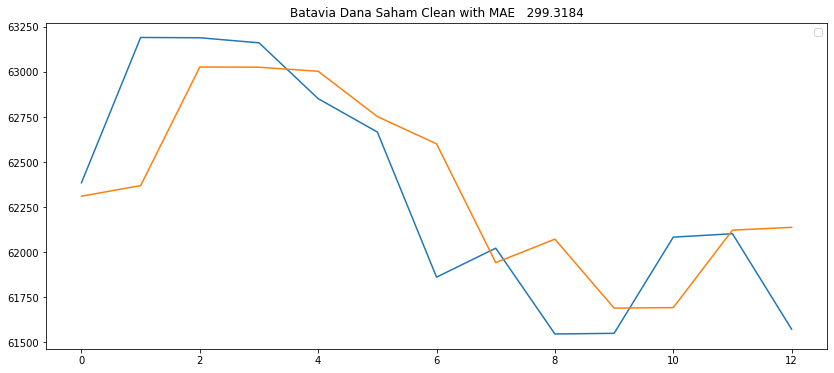

In [67]:
pred_result = {}
for i in dataset:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
    MAE = mean_absolute_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MAE {:10.4f}".format(i,MAE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend()